# Don't Get Kicked

>**Problem Statement:-** One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is >the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community >calls these unfortunate purchases "kicks".
>
>kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues >with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers >after transportation cost, throw-away repair work, and market losses in reselling the vehicle.
>
>Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to >provide the best inventory selection possible to their customers.

![](https://i0.wp.com/www.gopcsoft.com/wp-content/uploads/2017/02/Online-Car-Auction.jpg?w=1920&ssl=1)

This dataset consists of details of cars of different brand that were sold on auctions. The goal is to predict whether the  the car purchased at auction is a good by or a bad buy.

This dataset is taken from kaggle. You can find this data set at https://www.kaggle.com/c/DontGetKicked

## Installing and importing some required libraries

In [1]:
!pip install pandas numpy matplotlib plotly seaborn --quiet

In [2]:
!pip install opendatasets scikit-learn xgboost jovian --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import opendatasets as od
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import jovian
import warnings
warnings.filterwarnings('ignore')



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Dataset

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
#URL of the dataset
dataset_url = 'https://www.kaggle.com/c/DontGetKicked'

Downloading datasets from Kaggle by using opendatasets asks for a Kaggle Username and an API key.

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: uselessthingssss
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:01<00:00, 8.25MB/s]



Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


The dataset has been downloaded and extracted.

In [7]:
data_dir = './DontGetKicked'

In [8]:
os.listdir(data_dir)

['example_entry.csv',
 'test.csv',
 'Carvana_Data_Dictionary.txt',
 'test.zip',
 'training.csv',
 'training.zip']

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = "used-car-quality-prediction"

In [10]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Lets load the dataset by using **Pandas** library.

In [11]:
train_dir = data_dir + '/training.csv'
test_dir = data_dir + '/test.csv'

In [12]:
train_df = pd.read_csv(train_dir)
train_df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [13]:
test_df = pd.read_csv(test_dir)
test_df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [14]:
train_df.shape, test_df.shape

((72983, 34), (48707, 33))

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              48707 non-null  int64  
 1   PurchDate                          48707 non-null  object 
 2   Auction                            48707 non-null  object 
 3   VehYear                            48707 non-null  int64  
 4   VehicleAge                         48707 non-null  int64  
 5   Make                               48707 non-null  object 
 6   Model                              48707 non-null  object 
 7   Trim                               47157 non-null  object 
 8   SubModel                           48702 non-null  object 
 9   Color                              48703 non-null  object 
 10  Transmission                       48704 non-null  object 
 11  WheelTypeID                        46519 non-null  flo

## Handling Missing Values

In [17]:
train_nan_percent = ((train_df.isna().sum()/len(train_df))*100).sort_values(ascending = False)
train_nan_percent[train_nan_percent>0]

PRIMEUNIT                            95.315347
AUCGUART                             95.315347
WheelType                             4.348958
WheelTypeID                           4.342107
Trim                                  3.233630
MMRCurrentAuctionAveragePrice         0.431607
MMRCurrentRetailCleanPrice            0.431607
MMRCurrentRetailAveragePrice          0.431607
MMRCurrentAuctionCleanPrice           0.431607
MMRAcquisitionAuctionAveragePrice     0.024663
MMRAcquisitionAuctionCleanPrice       0.024663
MMRAcquisitionRetailAveragePrice      0.024663
MMRAcquisitonRetailCleanPrice         0.024663
Transmission                          0.012332
SubModel                              0.010961
Color                                 0.010961
Nationality                           0.006851
Size                                  0.006851
TopThreeAmericanName                  0.006851
dtype: float64

In [18]:
test_nan_percent = ((test_df.isna().sum()/len(test_df))*100).sort_values(ascending = False)
test_nan_percent[test_nan_percent>0]

PRIMEUNIT                            94.834418
AUCGUART                             94.834418
WheelType                             4.492167
WheelTypeID                           4.492167
Trim                                  3.182294
MMRCurrentAuctionCleanPrice           0.293592
MMRCurrentAuctionAveragePrice         0.293592
MMRCurrentRetailCleanPrice            0.293592
MMRCurrentRetailAveragePrice          0.293592
MMRAcquisitionAuctionAveragePrice     0.020531
MMRAcquisitionAuctionCleanPrice       0.020531
MMRAcquisitionRetailAveragePrice      0.020531
MMRAcquisitonRetailCleanPrice         0.020531
Nationality                           0.014372
Size                                  0.014372
TopThreeAmericanName                  0.014372
SubModel                              0.010265
Color                                 0.008212
Transmission                          0.006159
dtype: float64

`train_df` and `test_df` both have large number of nan values in columns `PRIMEUNIT` and `AUCGUART`. Also `WheelTypeID` is not so important so, we can drop this column too.

In [19]:
train_df.drop(["PRIMEUNIT", "AUCGUART", "WheelTypeID"],axis=1,inplace=True)

In [20]:
test_df.drop(["PRIMEUNIT", "AUCGUART", "WheelTypeID"],axis=1,inplace=True)

In [21]:
train_df.isna().sum().sort_values(ascending=False)

WheelType                            3174
Trim                                 2360
MMRCurrentAuctionCleanPrice           315
MMRCurrentRetailAveragePrice          315
MMRCurrentRetailCleanPrice            315
MMRCurrentAuctionAveragePrice         315
MMRAcquisitonRetailCleanPrice          18
MMRAcquisitionRetailAveragePrice       18
MMRAcquisitionAuctionCleanPrice        18
MMRAcquisitionAuctionAveragePrice      18
Transmission                            9
Color                                   8
SubModel                                8
Nationality                             5
TopThreeAmericanName                    5
Size                                    5
BYRNO                                   0
VNZIP1                                  0
VNST                                    0
VehBCost                                0
IsOnlineSale                            0
RefId                                   0
IsBadBuy                                0
VehOdo                            

In [22]:
test_df.isna().sum().sort_values(ascending=False)

WheelType                            2188
Trim                                 1550
MMRCurrentAuctionAveragePrice         143
MMRCurrentRetailCleanPrice            143
MMRCurrentRetailAveragePrice          143
MMRCurrentAuctionCleanPrice           143
MMRAcquisitonRetailCleanPrice          10
MMRAcquisitionRetailAveragePrice       10
MMRAcquisitionAuctionCleanPrice        10
MMRAcquisitionAuctionAveragePrice      10
Size                                    7
Nationality                             7
TopThreeAmericanName                    7
SubModel                                5
Color                                   4
Transmission                            3
BYRNO                                   0
VNZIP1                                  0
VNST                                    0
VehBCost                                0
IsOnlineSale                            0
RefId                                   0
PurchDate                               0
VehOdo                            

Columns `'SubModel', 'Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice,
MMRCurrentRetailCleanPrice` has less number of nan values. So we can drop the rows with the nan values.

In [23]:
nan_columns = ['SubModel', 'Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName',
               'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
               'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
               'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

In [24]:
train_df.dropna(subset=nan_columns, inplace=True)

In [25]:
test_df.dropna(subset=nan_columns, inplace=True)

Replacing nan values with unknown in the rest of the columns.

In [26]:
train_df.fillna('unkown', inplace =True)

In [27]:
test_df.fillna('unkown', inplace =True)

In [28]:
nan = test_df.isna().sum()
nan[nan>0]

Series([], dtype: int64)

In [29]:
nan = train_df.isna().sum()
nan[nan>0]

Series([], dtype: int64)

In [30]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Converting Data types to accurate data type.

Here, `PurchDate` column is of object type, lets convert it to datetime.

In [31]:
train_df["PurchDate"] = pd.to_datetime(train_df['PurchDate'])
train_df['PurchYear'] = train_df['PurchDate'].dt.year

train_df.tail()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear
72978,73010,1,2009-12-02,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,30212,GA,4200.0,0,993,2009
72979,73011,0,2009-12-02,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,unkown,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,30212,GA,6200.0,0,1038,2009
72980,73012,0,2009-12-02,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,30212,GA,8200.0,0,1893,2009
72981,73013,0,2009-12-02,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,30212,GA,7000.0,0,1974,2009
72982,73014,0,2009-12-02,ADESA,2006,3,MAZDA,MAZDA6,s,4D SEDAN S,SILVER,AUTO,Alloy,66855,OTHER ASIAN,MEDIUM,OTHER,7535.0,8771.0,8638.0,9973.0,7730.0,9102.0,11954.0,13246.0,18111,30212,GA,8000.0,0,1313,2009


In [32]:
test_df["PurchDate"] = pd.to_datetime(test_df['PurchDate'])
test_df['PurchYear'] = test_df['PurchDate'].dt.year

test_df.tail()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear
48702,121742,2010-11-17,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,20928,33411,FL,7955.0,0,1633,2010
48703,121743,2010-11-17,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,20928,33411,FL,7035.0,0,594,2010
48704,121744,2010-11-17,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,20928,33411,FL,6335.0,0,594,2010
48705,121745,2010-11-17,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,20928,33411,FL,8055.0,0,1038,2010
48706,121746,2010-11-17,MANHEIM,2003,7,BUICK,RENDEZVOUS AWD,CX,4D SUV CX,GOLD,AUTO,Covers,82174,AMERICAN,MEDIUM SUV,GM,3269.0,4435.0,6893.0,8221.0,4526.0,5761.0,8266.0,9388.0,20928,33411,FL,7755.0,0,5392,2010


## Exploratory Analysis and Visualization

Lets analyse the final dataset to get some insight about the data.


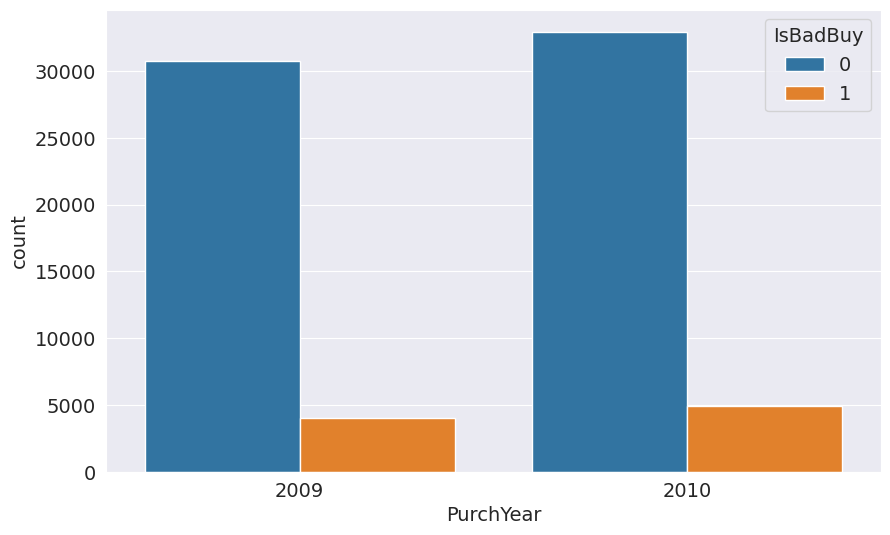

In [33]:
sns.countplot(data=train_df, x='PurchYear', hue='IsBadBuy');

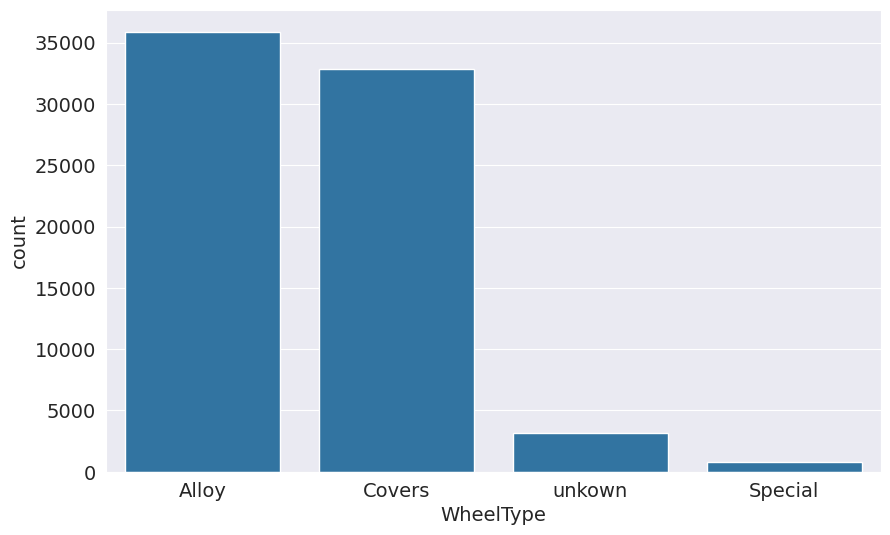

In [34]:
sns.countplot(data=train_df, x='WheelType');

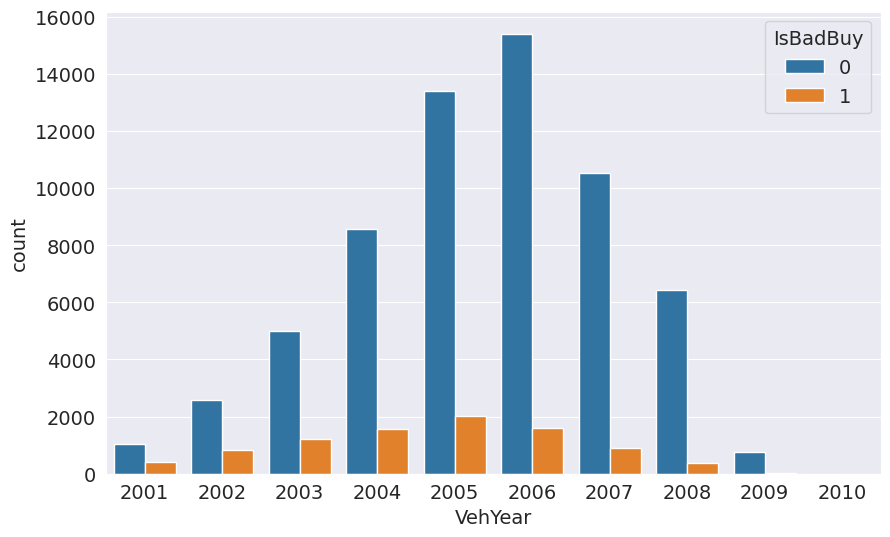

In [35]:
sns.countplot(data=train_df, x='VehYear', hue='IsBadBuy');

In [36]:
px.histogram(train_df, x='VehicleAge', color='IsBadBuy')

In [37]:
model_count = train_df['Model'].value_counts().sort_values(ascending=False)

In [38]:
top10_model = model_count.head(10)

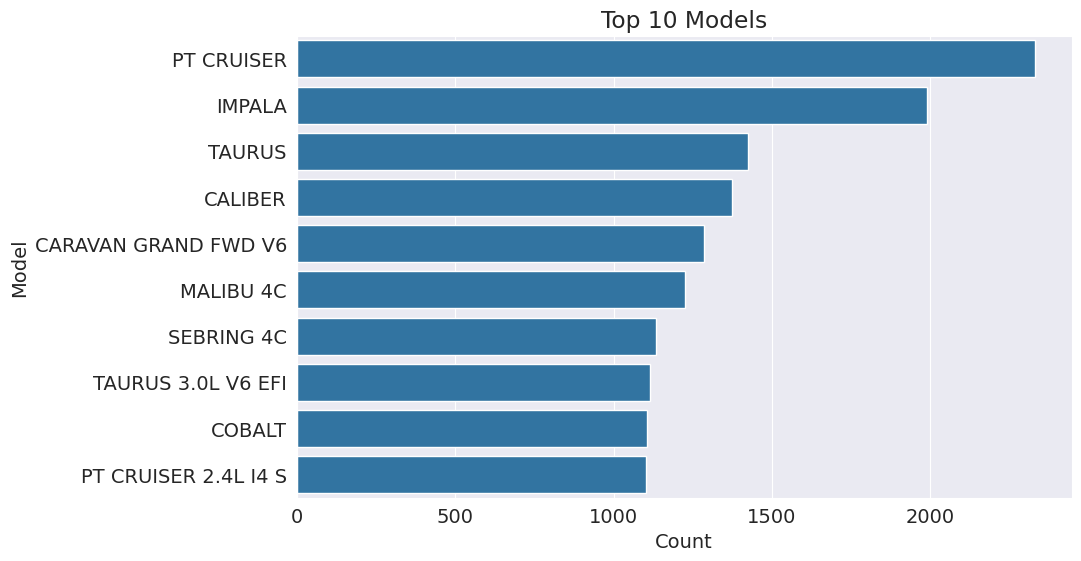

In [39]:
fig = sns.barplot(x=top10_model, y=top10_model.index)
fig.set(xlabel='Count', ylabel='Model', title='Top 10 Models');

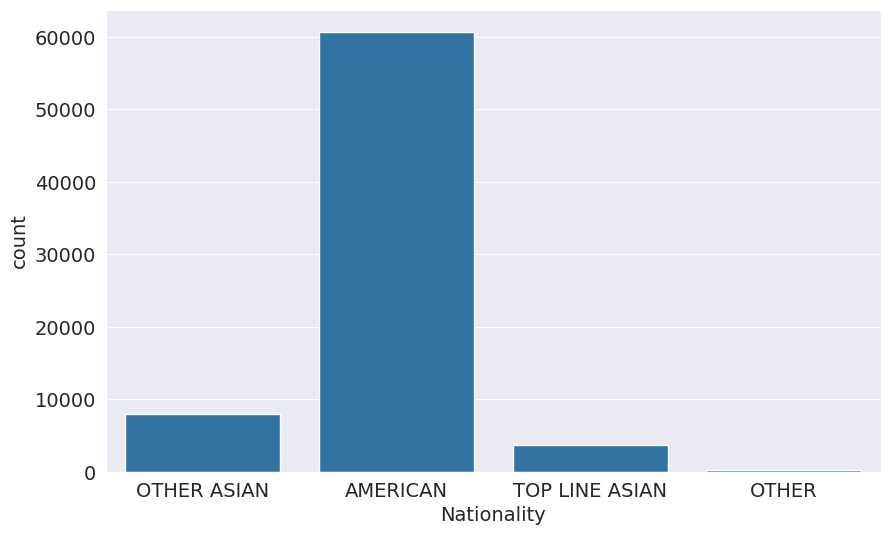

In [40]:
sns.countplot(data=train_df, x='Nationality');

In [41]:
hist_cols = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
             'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
             'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

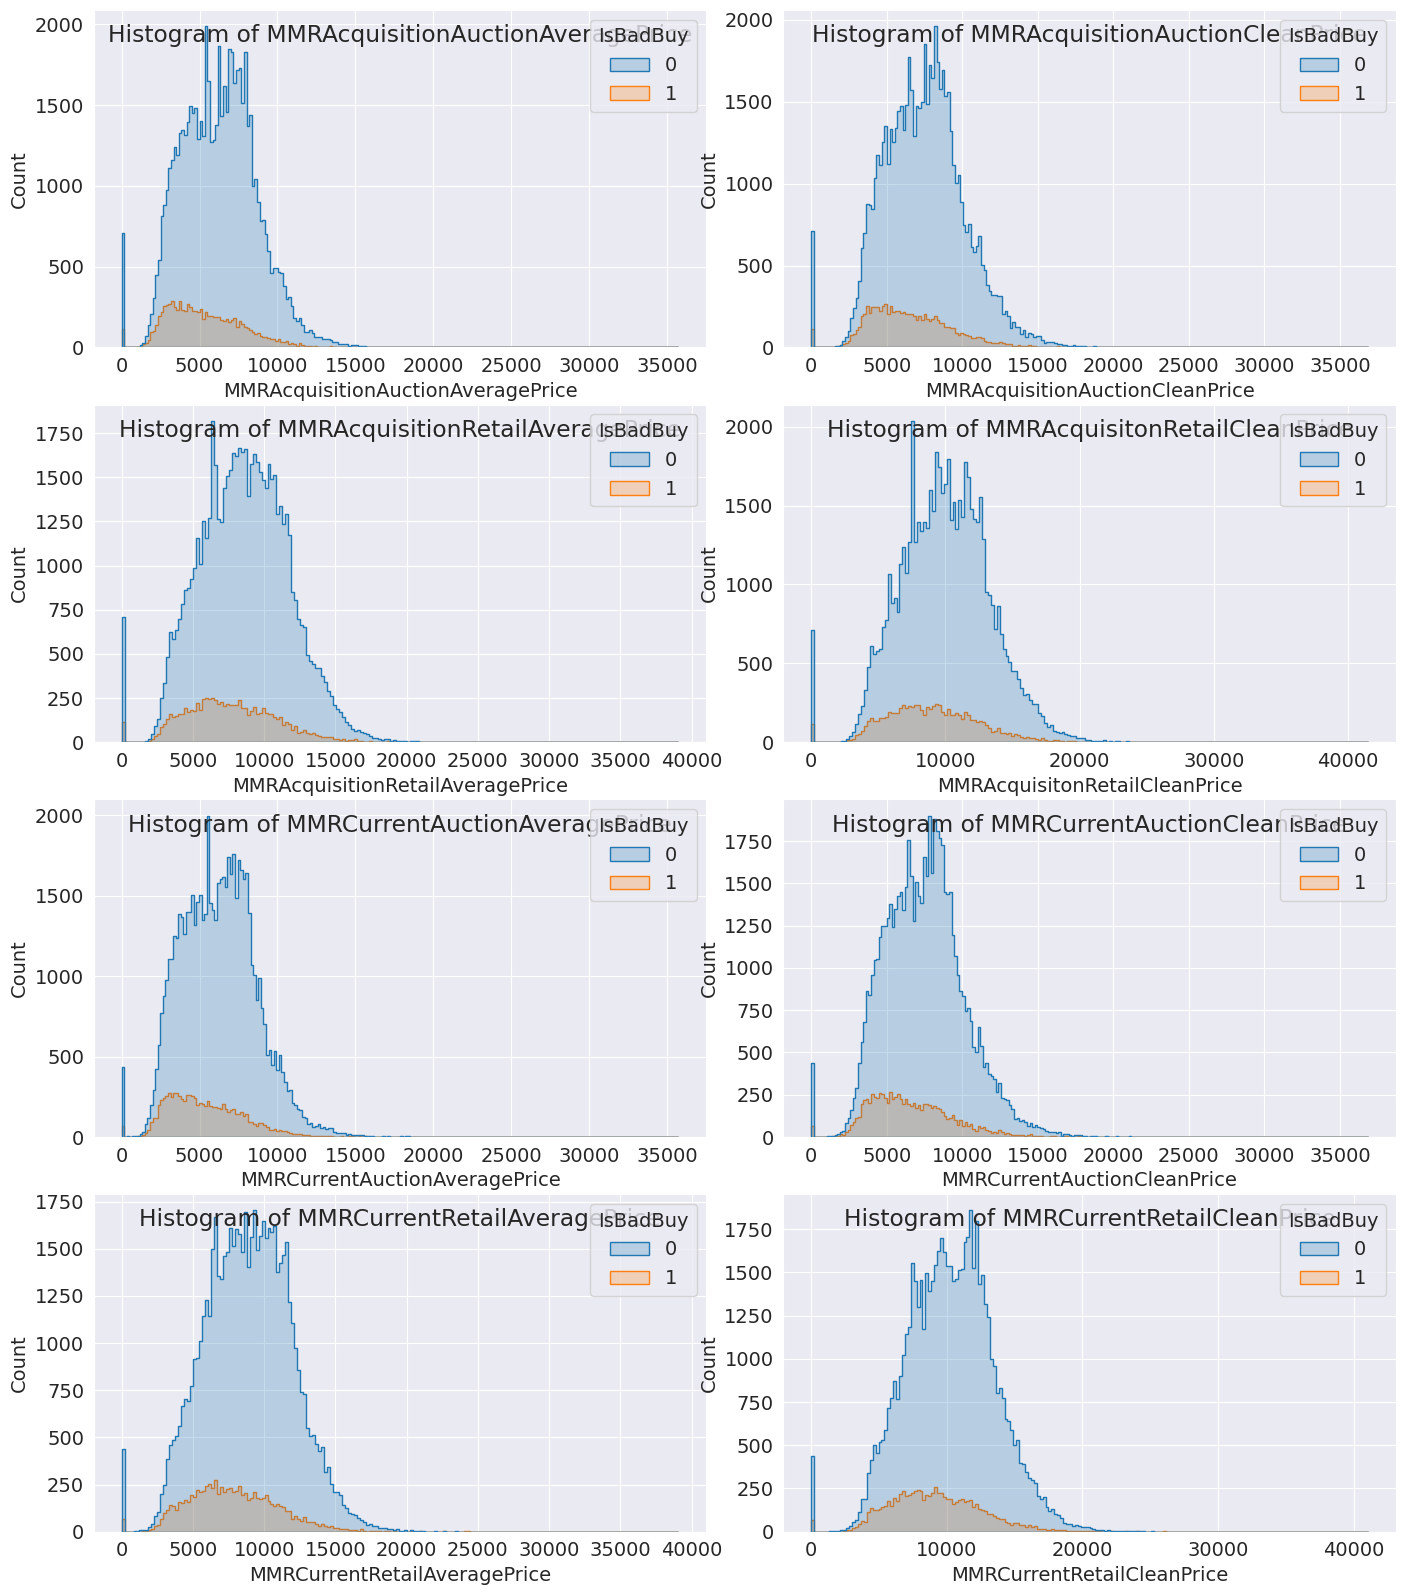

In [42]:
cols = 2
rows = 4
fig, axes = plt.subplots(rows, cols, figsize=(14, 8//cols*rows))
plt.tight_layout()

for i, col in enumerate(hist_cols):
    ax = axes[i//cols, i%cols]
    sns.histplot(data=train_df, x=col, hue='IsBadBuy', element='step', ax=ax)
    ax.set_title(f'Histogram of {col}', y=0.88)

plt.show()

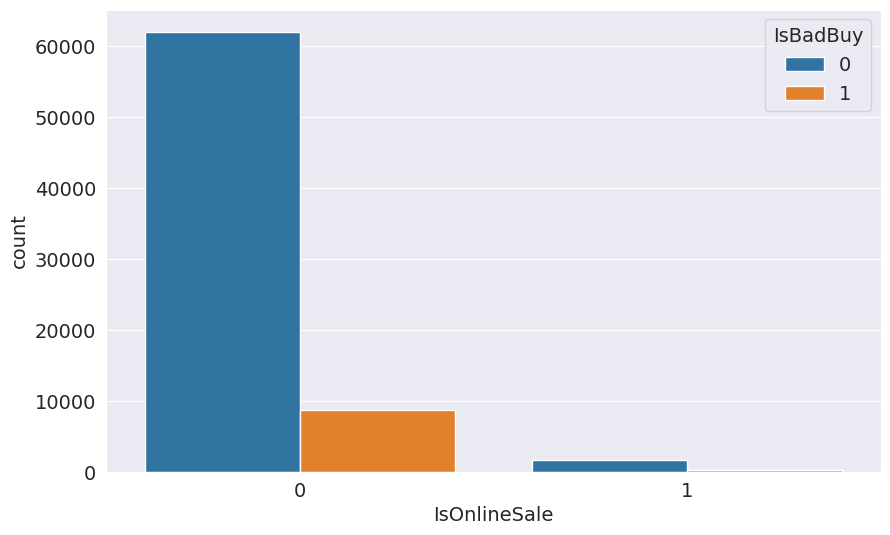

In [43]:
sns.countplot(data=train_df, x='IsOnlineSale', hue='IsBadBuy');

## Train/Val Split

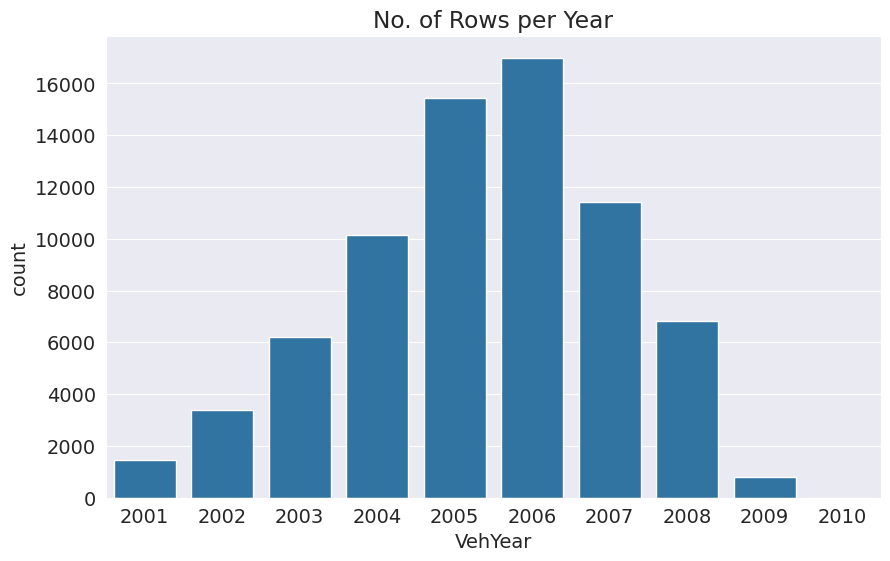

In [44]:
plt.title('No. of Rows per Year')
sns.countplot(data=train_df, x='VehYear');

In [45]:
train_set = train_df[train_df.VehYear<2007]
val_set = train_df[train_df.VehYear>=2007]

In [46]:
print('train_set.shape :', train_set.shape)
print('val_set.shape :', val_set.shape)

train_set.shape : (53643, 32)
val_set.shape : (19015, 32)


In [47]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Input and Target Columns

In [48]:
for col in train_df.columns:
    print(col,train_df[col].nunique())

RefId 72658
IsBadBuy 2
PurchDate 517
Auction 3
VehYear 10
VehicleAge 10
Make 33
Model 1060
Trim 135
SubModel 860
Color 16
Transmission 3
WheelType 4
VehOdo 39836
Nationality 4
Size 12
TopThreeAmericanName 4
MMRAcquisitionAuctionAveragePrice 10338
MMRAcquisitionAuctionCleanPrice 11375
MMRAcquisitionRetailAveragePrice 12719
MMRAcquisitonRetailCleanPrice 13449
MMRCurrentAuctionAveragePrice 10315
MMRCurrentAuctionCleanPrice 11265
MMRCurrentRetailAveragePrice 12493
MMRCurrentRetailCleanPrice 13191
BYRNO 74
VNZIP1 153
VNST 37
VehBCost 2072
IsOnlineSale 2
WarrantyCost 281
PurchYear 2


In [49]:
input_cols = ['Auction', 'VehYear', 'VehicleAge', 'Make', 'Color', 'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
              'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
              'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
              'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']
target_col = 'IsBadBuy'

In [50]:
print(input_cols)

['Auction', 'VehYear', 'VehicleAge', 'Make', 'Color', 'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']


In [51]:
target_col

'IsBadBuy'

We can now create inputs and targets for the training, validation sets for further processing and model training.

In [52]:
train_inputs = train_set[input_cols].copy()
train_target = train_set[target_col].copy()

In [53]:
val_inputs = val_set[input_cols].copy()
val_target = val_set[target_col].copy()

Let's also identify the numeric and categorical columns.

In [54]:
numeric_cols = ['VehYear', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
                'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
                'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost']
categorical_cols = ['Auction', 'Make', 'Color', 'Transmission', 'WheelType', 'Nationality',
                    'Size', 'TopThreeAmericanName', 'VNST', 'IsOnlineSale']

In [55]:
print(numeric_cols)

['VehYear', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost']


In [56]:
print(categorical_cols)

['Auction', 'Make', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST', 'IsOnlineSale']


In [57]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Scaling Numeric Features

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [60]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [61]:
train_inputs[numeric_cols].describe().loc[['min', 'max']]

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost
min,0.000000,0.333333,0.004897,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.555556,1.000000,1.000000,0.604977,0.650289,0.674284,0.694735,0.56349,0.612876,0.619831,0.667503,0.401249,1.0


## Encoding Categorical Data

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [64]:
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [65]:
encoder.categories_

[array(['ADESA', 'MANHEIM', 'OTHER'], dtype=object),
 array(['ACURA', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE',
        'FORD', 'GMC', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU',
        'JEEP', 'KIA', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCURY', 'MINI',
        'MITSUBISHI', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC',
        'SATURN', 'SCION', 'SUBARU', 'SUZUKI', 'TOYOTA', 'TOYOTA SCION',
        'VOLKSWAGEN', 'VOLVO'], dtype=object),
 array(['BEIGE', 'BLACK', 'BLUE', 'BROWN', 'GOLD', 'GREEN', 'GREY',
        'MAROON', 'NOT AVAIL', 'ORANGE', 'OTHER', 'PURPLE', 'RED',
        'SILVER', 'WHITE', 'YELLOW'], dtype=object),
 array(['AUTO', 'MANUAL', 'Manual'], dtype=object),
 array(['Alloy', 'Covers', 'Special', 'unkown'], dtype=object),
 array(['AMERICAN', 'OTHER', 'OTHER ASIAN', 'TOP LINE ASIAN'], dtype=object),
 array(['COMPACT', 'CROSSOVER', 'LARGE', 'LARGE SUV', 'LARGE TRUCK',
        'MEDIUM', 'MEDIUM SUV', 'SMALL SUV', 'SMALL TRUCK', 'SPECIALTY',
        'SPORTS',

In [67]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [68]:
len(encoded_cols)

118

In [69]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
print('train_inputs.shape:',train_inputs.shape)

train_inputs.shape: (53643, 141)


In [70]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
print('val_inputs.shape:',val_inputs.shape)

val_inputs.shape: (19015, 141)


In [71]:
train_inputs

,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_TOYOTA SCION,Make_VOLKSWAGEN,Make_VOLVO,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_unkown,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,VNST_AL,VNST_AR,VNST_AZ,VNST_CA,VNST_CO,VNST_FL,VNST_GA,VNST_IA,VNST_ID,VNST_IL,VNST_IN,VNST_KY,VNST_LA,VNST_MA,VNST_MD,VNST_MI,VNST_MN,VNST_MO,VNST_MS,VNST_NC,VNST_NE,VNST_NH,VNST_NJ,VNST_NM,VNST_NV,VNST_NY,VNST_OH,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
0,ADESA,0.555556,0.333333,MAZDA,RED,AUTO,Alloy,0.759487,OTHER ASIAN,MEDIUM,OTHER,0.228291,0.266665,0.297748,0.327853,0.208583,0.232019,0.296750,0.302202,FL,0.156132,0,0.092524,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,ADESA,0.333333,0.555556,DODGE,WHITE,AUTO,Alloy,0.800491,AMERICAN,LARGE TRUCK,CHRYSLER,0.191871,0.227434,0.278838,0.303071,0.208723,0.250197,0.291044,0.311505,FL,0.167129,0,0.083997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ADESA,0.444444,0.444444,DODGE,MAROON,AUTO,Covers,0.622065,AMERICAN,MEDIUM,CHRYSLER,0.089637,0.129141,0.177661,0.203872,0.112956,0.150764,0.182856,0.211923,FL,0.107746,0,0.131751,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,ADESA,0.333333,0.555556,DODGE,SILVER,AUTO,Alloy,0.548209,AMERICAN,COMPACT,CHRYSLER,0.052993,0.072574,0.119191,0.137168,0.051621,0.071787,0.111950,0.134382,FL,0.090151,0,0.023877,1.0,0.0,0.0

As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.

In [72]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [73]:
X_train

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_TOYOTA SCION,Make_VOLKSWAGEN,Make_VOLVO,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_unkown,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,VNST_AL,VNST_AR,VNST_AZ,VNST_CA,VNST_CO,VNST_FL,VNST_GA,VNST_IA,VNST_ID,VNST_IL,VNST_IN,VNST_KY,VNST_LA,VNST_MA,VNST_MD,VNST_MI,VNST_MN,VNST_MO,VNST_MS,VNST_NC,VNST_NE,VNST_NH,VNST_NJ,VNST_NM,VNST_NV,VNST_NY,VNST_OH,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV,IsOnlineSale_0,IsOnlineSale_1
0,0.555556,0.333333,0.759487,0.228291,0.266665,0.297748,0.327853,0.208583,0.232019,0.296750,0.302202,0.156132,0.092524,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,0.555556,0.800491,0.191871,0.227434,0.278838,0.303071,0.208723,0.250197,0.291044,0.311505,0.167129,0.083997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.444444,0.444444,0.622065,0.089637,0.129141,0.177661,0.203872,0.112956,0.150764,0.182856,0.211923,0.107746,0.131751,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.333333,0.555556,0.548209,0.052993,0.072574,0.119191,0.137168,0.051621,0.071787,0.111950,0.134382,0.090151,0.023877,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [74]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Training a Logistic Regression Model

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logistic_model = LogisticRegression(solver='liblinear')

In [77]:
logistic_model.fit(X_train, train_target)

LogisticRegression(solver='liblinear')

In [78]:
print(logistic_model.coef_.tolist())

[[0.7350469539891153, 2.6900821703382296, 1.1641052707220114, -1.2430409125971749, -1.2806438598525849, 1.4679882096812704, 1.2194527833068014, 1.3846597244607106, 1.81381680836713, -1.674483228289969, -1.3385544037095076, -4.597744189334316, 0.9653850889695723, -0.2815867614676963, -0.27162082494212564, -0.4522014276202693, 0.17519973576771547, -0.13184687136313514, -0.06329708052281657, -0.10311383247503868, 0.051799043597269875, -0.3140223768174316, -0.25396207995591846, -0.25669937651870084, -0.46321378399674384, -0.042389582696923216, -0.2528777000305086, 0.4348570298834864, -0.9115602995985796, -0.08043066393178089, -0.038029102671062756, 0.4772759294416713, 0.3412289061765075, 0.018244272768675854, -0.0709737684563137, 0.44316361063982834, -0.45207400149568194, 0.2097042037356557, 0.040265830690917735, 0.26797736688332546, 0.014338384754953575, 0.0982895082704404, -0.2817081748248527, 0.7776707253236483, 0.4397754052499686, -0.3286311045898169, -0.10087389521821379, -0.111601765

In [79]:
weight_df=pd.DataFrame({'features':(numeric_cols + encoded_cols),'weight':logistic_model.coef_.tolist()[0]})
weight_df

,features,weight
0,VehYear,0.735047
1,VehicleAge,2.690082
2,VehOdo,1.164105
3,MMRAcquisitionAuctionAveragePrice,-1.243041
4,MMRAcquisitionAuctionCleanPrice,-1.280644
5,MMRAcquisitionRetailAveragePrice,1.467988
6,MMRAcquisitonRetailCleanPrice,1.219453
7,MMRCurrentAuctionAveragePrice,1.384660
8,MMRCurrentAuctionCleanPrice,1.813817
9,MMRCurrentRetailAveragePrice,-1.674483


In [80]:
print(logistic_model.intercept_)

[-1.00540901]


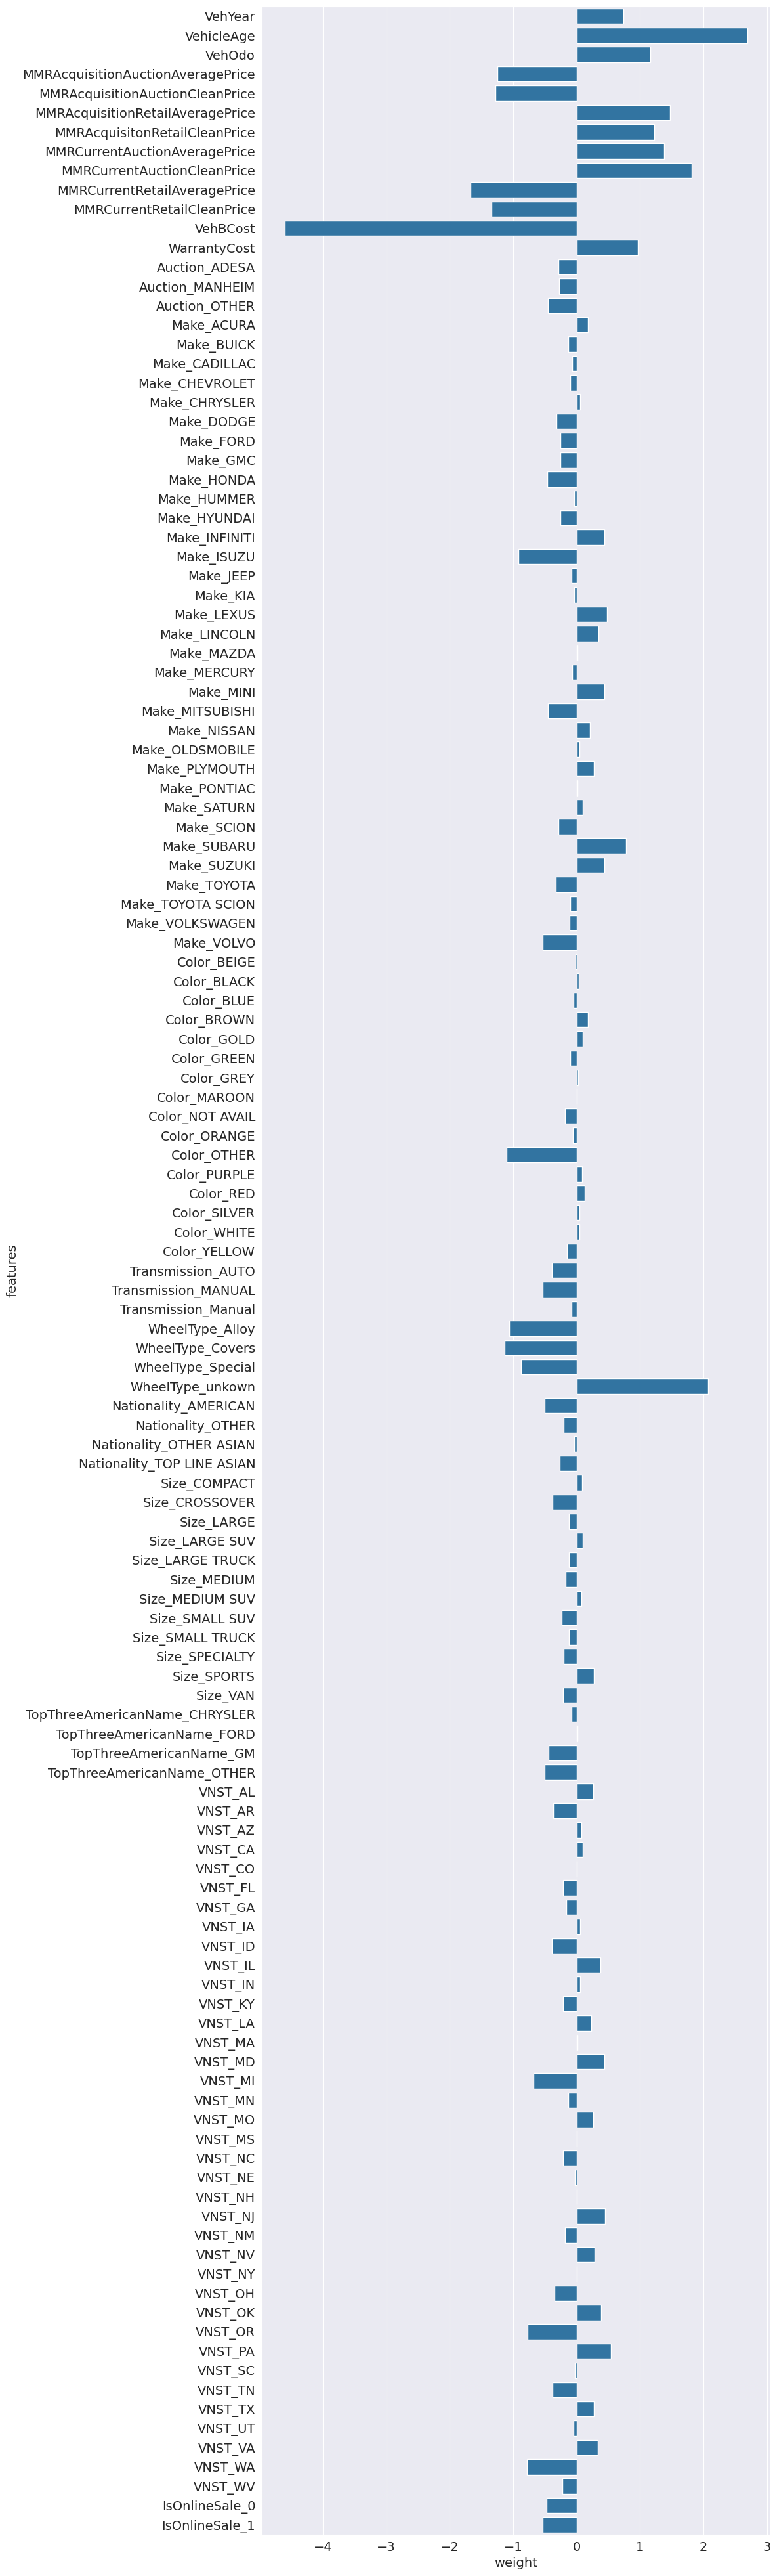

In [81]:
plt.figure(figsize=(10,50))
sns.barplot(data=weight_df,x='weight',y='features');

### Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, validation sets

In [82]:
train_preds = logistic_model.predict(X_train)

In [83]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

We can output a probabilistic prediction using `predict_proba`.

In [84]:
train_probs = logistic_model.predict_proba(X_train)
train_probs

array([[0.91643333, 0.08356667],
       [0.90971702, 0.09028298],
       [0.93127136, 0.06872864],
       ...,
       [0.90543944, 0.09456056],
       [0.95340074, 0.04659926],
       [0.94747003, 0.05252997]])

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(train_target, train_preds)

0.8791641034244916

The model achieves an accuracy of 87.9% on the training set.

In [87]:
val_preds = logistic_model.predict(X_val)

In [88]:
accuracy_score(val_target, val_preds)

0.9413094925059163

The model achieves an accuracy of 94.1% on the validation set.

In [89]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Training and Visualizing Decision Trees

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
decision_model = DecisionTreeClassifier(random_state=42)

In [92]:
decision_model.fit(X_train, train_target)

DecisionTreeClassifier(random_state=42)

### Evaluation

In [93]:
train_preds = decision_model.predict(X_train)

In [94]:
train_probs = decision_model.predict_proba(X_train)

In [95]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [96]:
accuracy_score(train_target, train_preds)

1.0

The training set accuracy is 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using `model.score`

In [97]:
decision_model.score(X_val, val_target)

0.84191427820142

The training accuracy is 100%, while the accuracy on the validation set is 84.1%.

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting"

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [98]:
from sklearn.tree import plot_tree, export_text

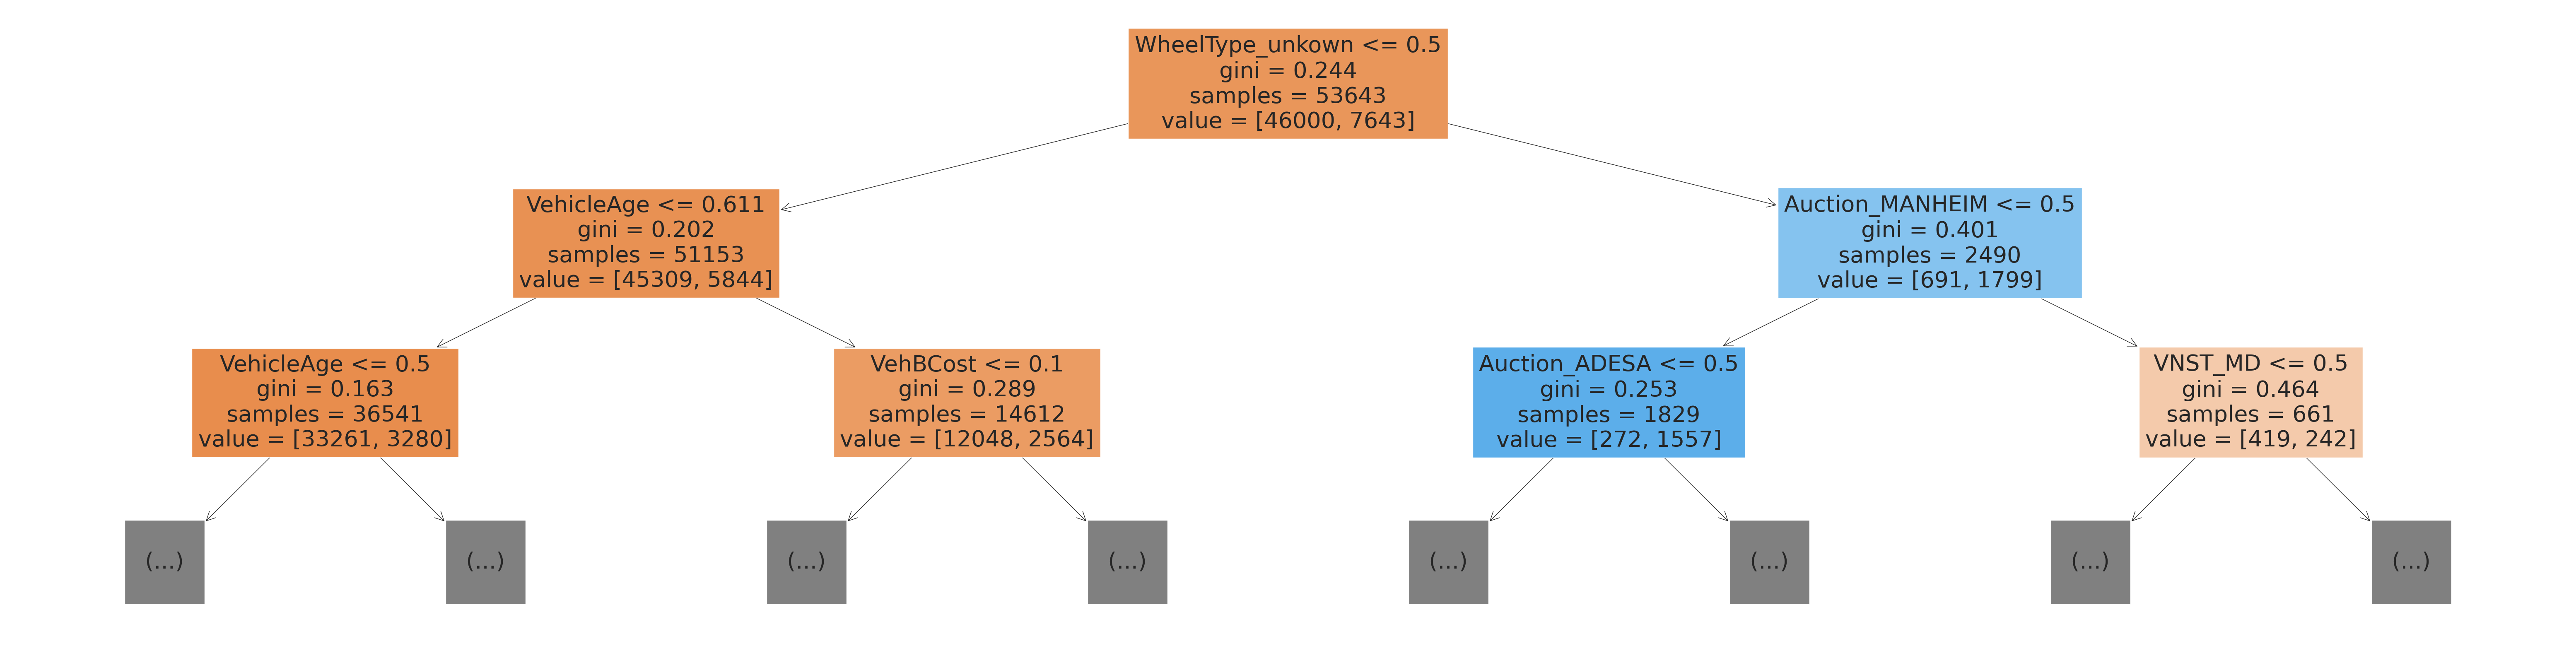

In [99]:
plt.figure(figsize=(80,20))
plot_tree(decision_model, feature_names=X_train.columns, max_depth=2, filled=True);

In [100]:
decision_model.tree_.max_depth

47

In [101]:
tree_text = export_text(decision_model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- WheelType_unkown <= 0.50
|   |--- VehicleAge <= 0.61
|   |   |--- VehicleAge <= 0.50
|   |   |   |--- MMRAcquisitionAuctionCleanPrice <= 0.53
|   |   |   |   |--- VehBCost <= 0.10
|   |   |   |   |   |--- MMRCurrentAuctionAveragePrice <= 0.14
|   |   |   |   |   |   |--- VNST_MD <= 0.50
|   |   |   |   |   |   |   |--- MMRAcquisitionAuctionCleanPrice <= 0.21
|   |   |   |   |   |   |   |   |--- MMRCurrentAuctionAveragePrice <= 0.13
|   |   |   |   |   |   |   |   |   |--- VNST_TX <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- VNST_IL <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 35
|   |   |   |   |   |   |   |   |   |   |--- VNST_IL >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- VNST_TX >  0.50
|   |   |   |   |   |   |   |   |   |   |--- VehOdo <= 0.64
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   | 

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [102]:
decision_model.feature_importances_

array([4.32569307e-03, 2.01933400e-02, 8.61571276e-02, 3.89769598e-02,
       4.88360848e-02, 4.58978544e-02, 4.74935861e-02, 3.97146528e-02,
       4.40439202e-02, 5.07771993e-02, 4.61473388e-02, 7.30287851e-02,
       4.08516083e-02, 4.62026412e-03, 2.25826982e-02, 2.31291390e-03,
       9.50158070e-05, 8.33990098e-04, 0.00000000e+00, 4.50440864e-03,
       4.38958652e-03, 2.90692333e-03, 2.32277372e-03, 7.96462660e-04,
       1.17572977e-04, 0.00000000e+00, 1.56261329e-03, 3.68645249e-04,
       2.92167358e-04, 9.94896573e-04, 2.05378205e-03, 0.00000000e+00,
       4.97063475e-04, 1.65159375e-03, 1.80351976e-03, 1.35841370e-04,
       8.45470733e-04, 1.48461129e-03, 6.82164363e-04, 0.00000000e+00,
       3.00265352e-03, 2.42095836e-03, 3.77197470e-04, 2.22444710e-04,
       1.69773271e-03, 7.94660351e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.71735821e-03, 5.16437906e-03, 7.18278677e-03,
       2.12304096e-03, 6.50112329e-03, 5.29355617e-03, 6.82272620e-03,
      

Let's turn this into a dataframe and visualize the most important features.

In [103]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': decision_model.feature_importances_
}).sort_values('importance', ascending=False)

In [104]:
importance_df.head(10)

,feature,importance
71,WheelType_unkown,0.134031
2,VehOdo,0.086157
11,VehBCost,0.073029
9,MMRCurrentRetailAveragePrice,0.050777
4,MMRAcquisitionAuctionCleanPrice,0.048836
6,MMRAcquisitonRetailCleanPrice,0.047494
10,MMRCurrentRetailCleanPrice,0.046147
5,MMRAcquisitionRetailAveragePrice,0.045898
8,MMRCurrentAuctionCleanPrice,0.044044
12,WarrantyCost,0.040852


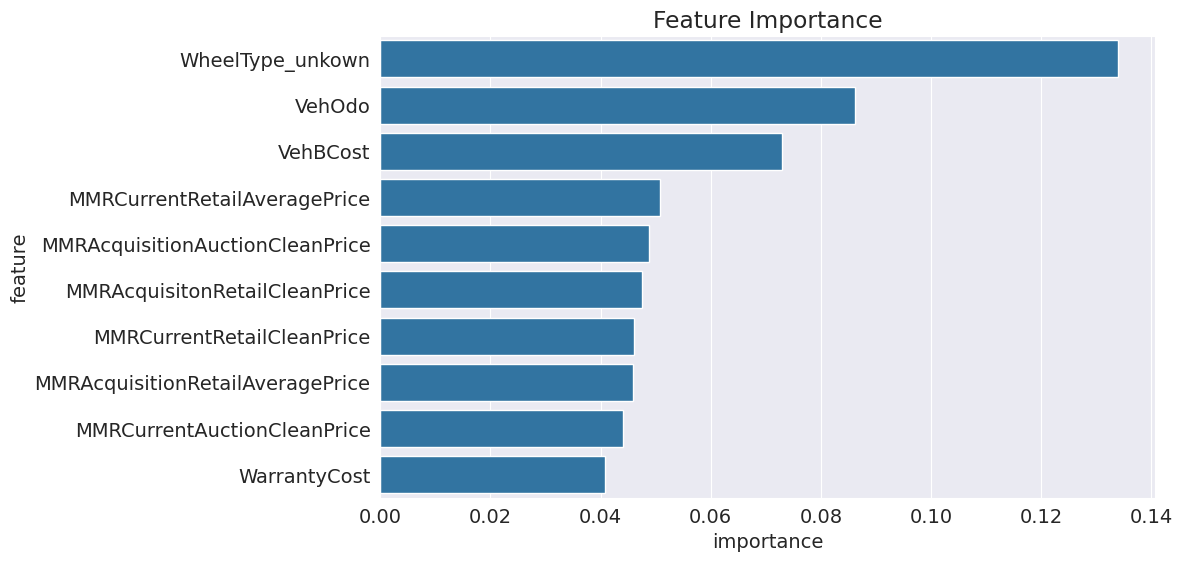

In [105]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [106]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was 84%. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as _regularlization_.


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

#### max_depth

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [107]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [108]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [109]:
model.score(X_train, train_target)

0.881979009376806

In [110]:
model.score(X_val, val_target)

0.9473047594004733

Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

#### max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [111]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [112]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [113]:
model.score(X_train, train_target)

0.8888951028093134

In [114]:
model.score(X_val, val_target)

0.9469892190376019

### Training the best model

In [115]:
model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=128, random_state=42)
model.fit(X_train, train_target)
model.score(X_train, train_target), model.score(X_val, val_target)

(0.881979009376806, 0.9473047594004733)

## Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
# Create the model
rf1 = RandomForestClassifier(n_jobs=-1,random_state=42)

In [118]:
# Fit the model
rf1.fit(X_train, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

Lets make predictions using the random forest classifier.

In [119]:
rf1_train_preds = rf1.predict(X_train)

In [120]:
accuracy_score(train_target, rf1_train_preds)

0.9999813582387264

In [121]:
rf1_val_preds = rf1.predict(X_val)

In [122]:
accuracy_score(val_target, rf1_val_preds)

0.9480936103076518

### Hyperparameter Tuning

Let us now tune the hyperparameters of our model.

Let's define a helper function `test_params` which can test the given value of one or more hyperparameters.

In [123]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_target)
    train_score = accuracy_score(model.predict(X_train), train_target)
    val_score = accuracy_score(model.predict(X_val), val_target)
    return train_score, val_score

In [124]:
test_params(n_estimators=20, max_depth=20)

(0.9197099341945827, 0.9467788587956876)

Let's also define a helper function to test and plot different values of a single parameter.

In [125]:
def test_param_and_plot(param_name, param_values):
    Train_score, Val_score = [], []
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        Train_score.append(train_score)
        Val_score.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, Train_score, 'b-o')
    plt.plot(param_values, Val_score, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend(['Training', 'Validation'])

#### max_depth

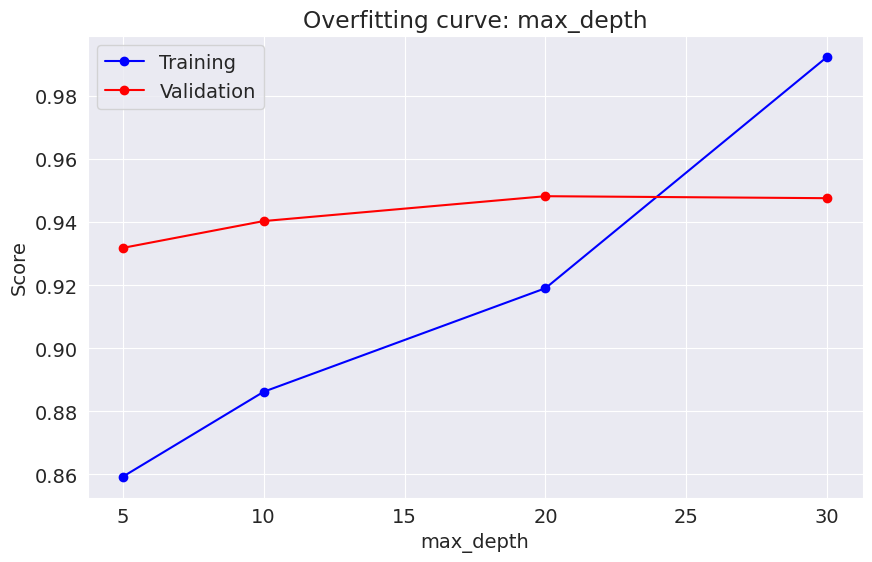

In [126]:
test_param_and_plot('max_depth', [5, 10, 20, 30])

From the above graph, it appears that the best value for `max_depth` is around 20, beyond which the model starts to overfit.

#### n_estimators

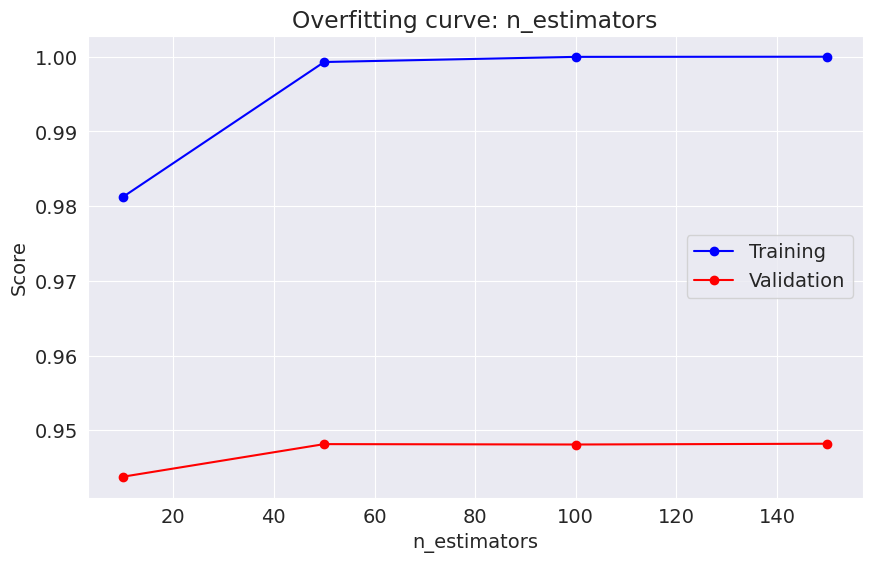

In [127]:
test_param_and_plot('n_estimators',[10, 50, 100, 150])

From the above graph, it appears that the best value for `n_estimators` is between 100 - 120, beyond which the model starts to overfit.

#### min_samples_split, min_samples_leaf

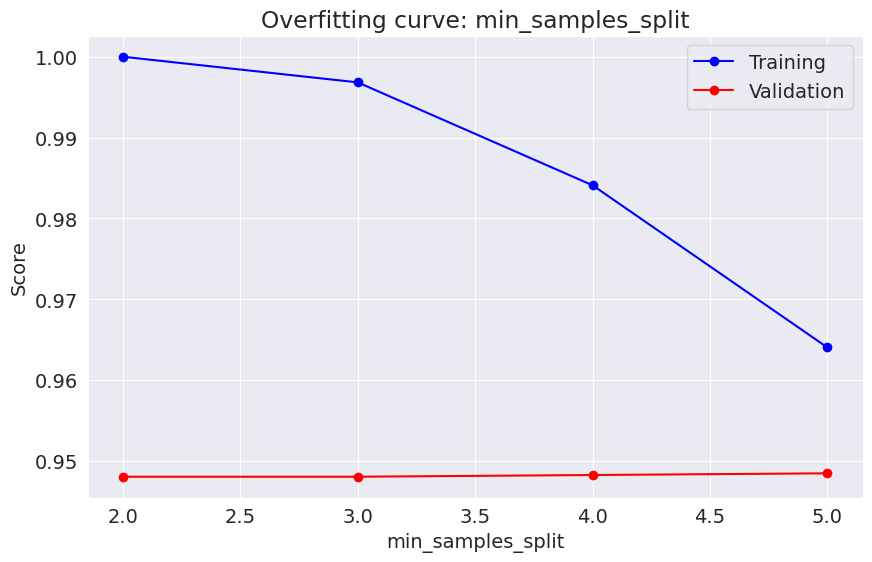

In [128]:
test_param_and_plot('min_samples_split',[2,3,4,5])

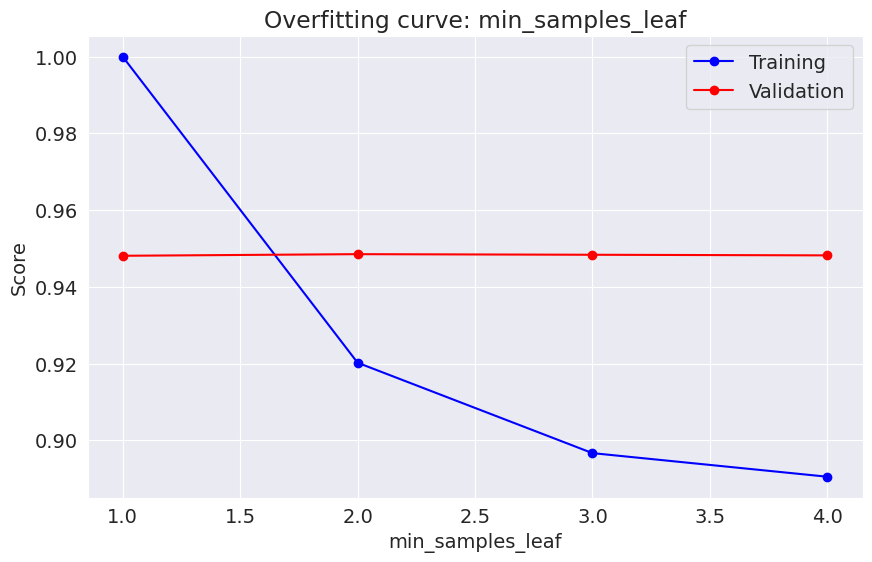

In [129]:
test_param_and_plot('min_samples_leaf',[1,2,3,4])

From above graphs, the best values for `min_samples_split` and `min_samples_leaf` are 2 and 1 repectively. (default values)

#### max_features

In [130]:
len(X_train.columns)

131

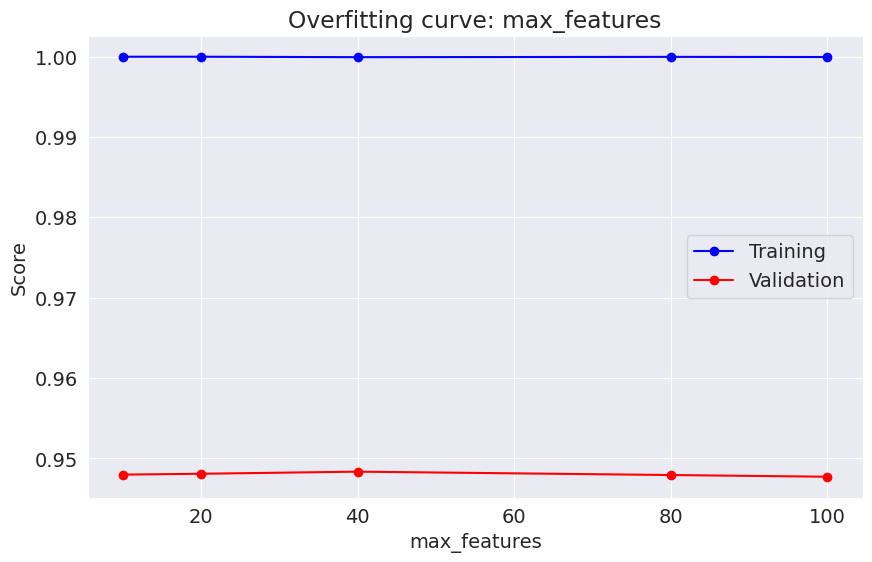

In [131]:
test_param_and_plot('max_features',[10,20,40,80,100])

`max_features` doesn't seems to have much effect on the accuracy score.

### Training the Best Model

In [132]:
rf2 = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=20, n_estimators=100,
                             min_samples_split=2, min_samples_leaf=1)

In [133]:
rf2.fit(X_train, train_target)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [134]:
train_preds = rf2.predict(X_train)

In [135]:
accuracy_score(train_target,train_preds)

0.9191133978338274

In [136]:
val_preds = rf2.predict(X_val)

In [137]:
accuracy_score(val_target, val_preds)

0.9483039705495662

In [138]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

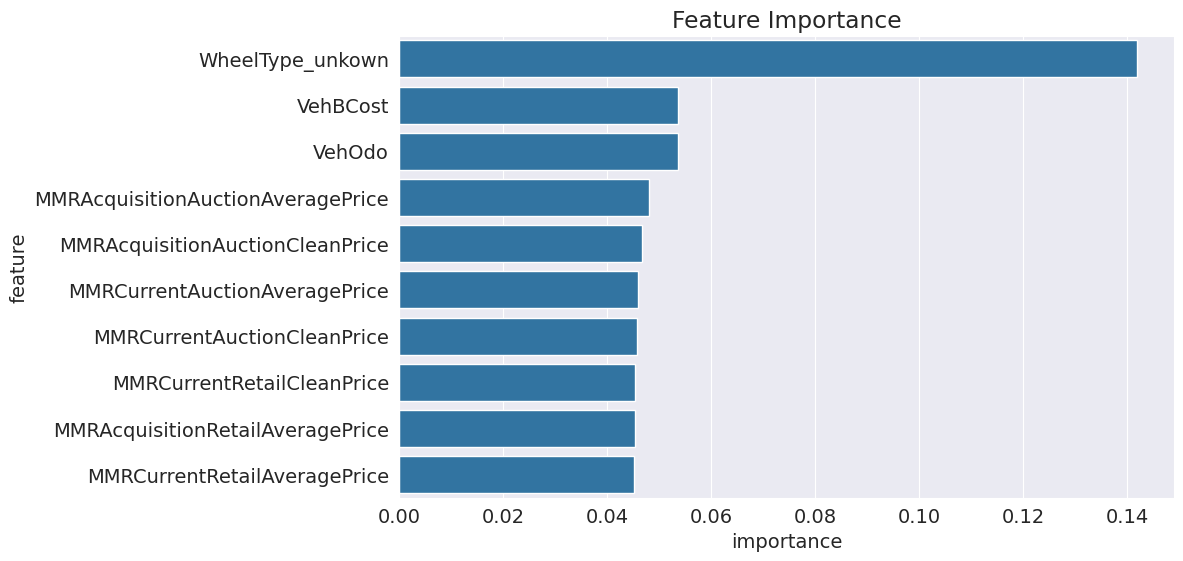

In [139]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [140]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Gradient Boosting

#### Training

In [141]:
!pip install xgboost --upgrade --quiet

In [142]:
from xgboost import XGBClassifier

In [143]:
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss", n_jobs=-1)

In [144]:
model.fit(X_train, train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [145]:
train_preds = model.predict(X_train)

In [146]:
accuracy_score(train_target, train_preds)

0.899297205599985

In [147]:
val_preds = model.predict(X_val)

In [148]:
accuracy_score(val_target, val_preds)

0.9468314488561662

### Hyperparameter Tuning

In [149]:
def test_params(**params):
    model = XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric="logloss", **params)
    model.fit(X_train, train_target)
    train_score = accuracy_score(model.predict(X_train), train_target)
    val_score = accuracy_score(model.predict(X_val), val_target)
    return train_score, val_score

#### n_estimators

In [150]:
test_params(n_estimators=10)

(0.885893779244263, 0.9472521693399948)

In [151]:
def test_param_and_plot(param_name, param_values):
    Train_score, Val_score = [], []
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        Train_score.append(train_score)
        Val_score.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, Train_score, 'b-o')
    plt.plot(param_values, Val_score, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend(['Training', 'Validation'])

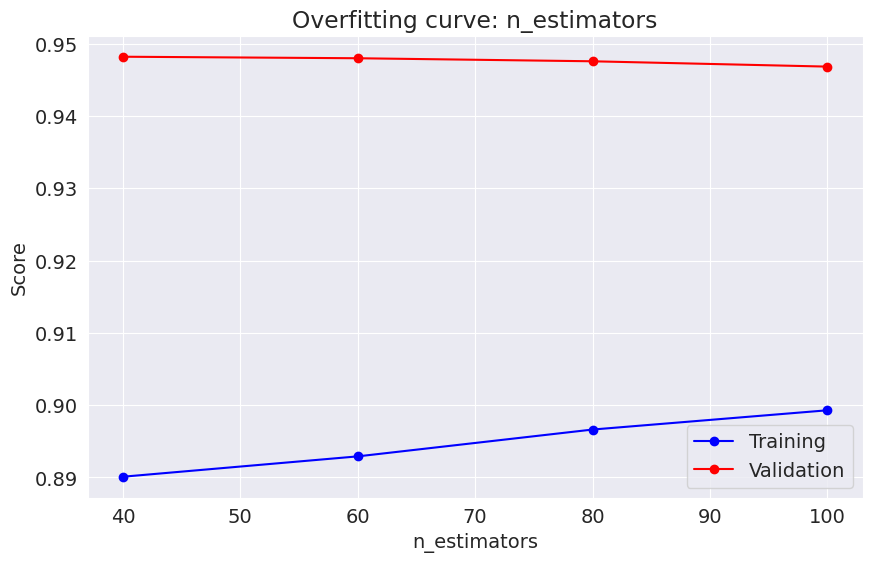

In [152]:
test_param_and_plot('n_estimators', [40,60,80,100])

Sweet spot for n_estimator seems to be 60

#### max_depth

In [153]:
test_params(max_depth=2)

(0.8828178886341181, 0.9481462003681305)

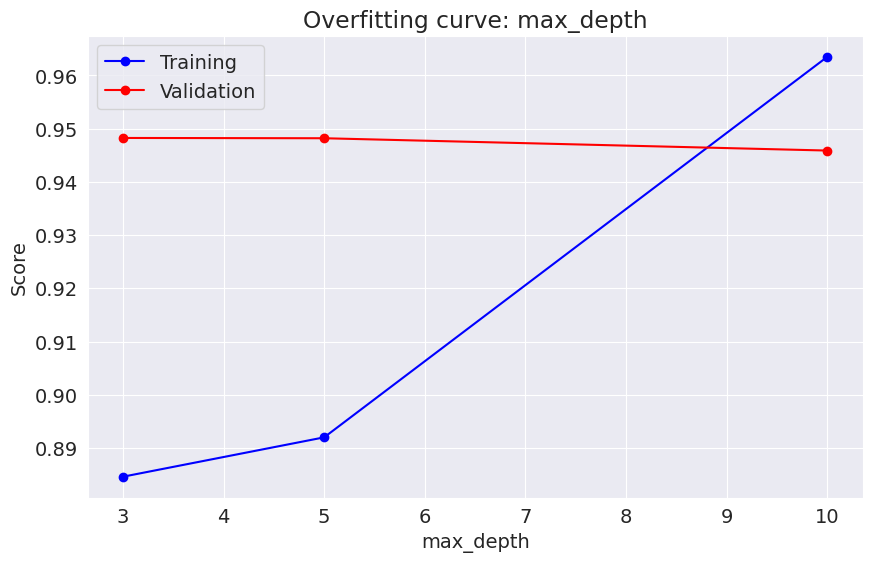

In [154]:
test_param_and_plot('max_depth', [3,5,10])

#### learning_rate

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

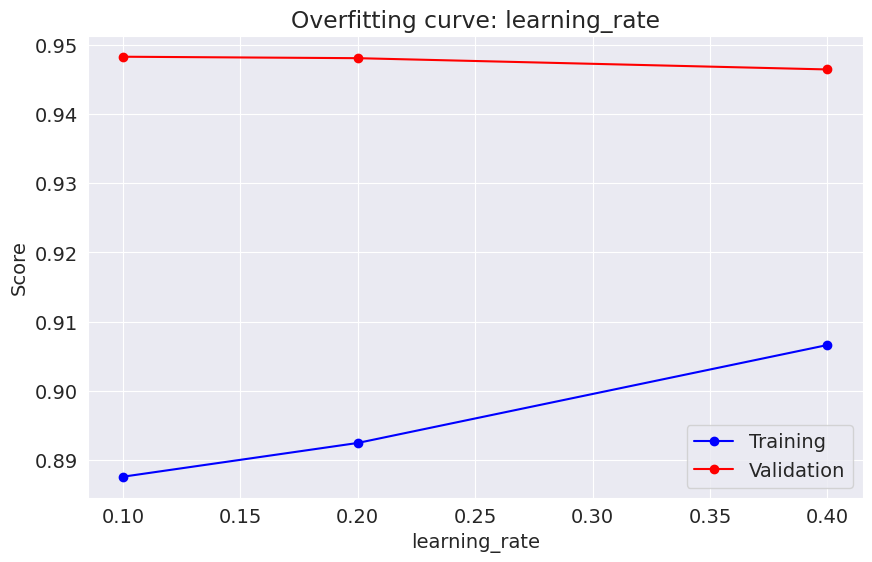

In [155]:
test_param_and_plot('learning_rate', [0.1,0.2,0.4])

#### booster

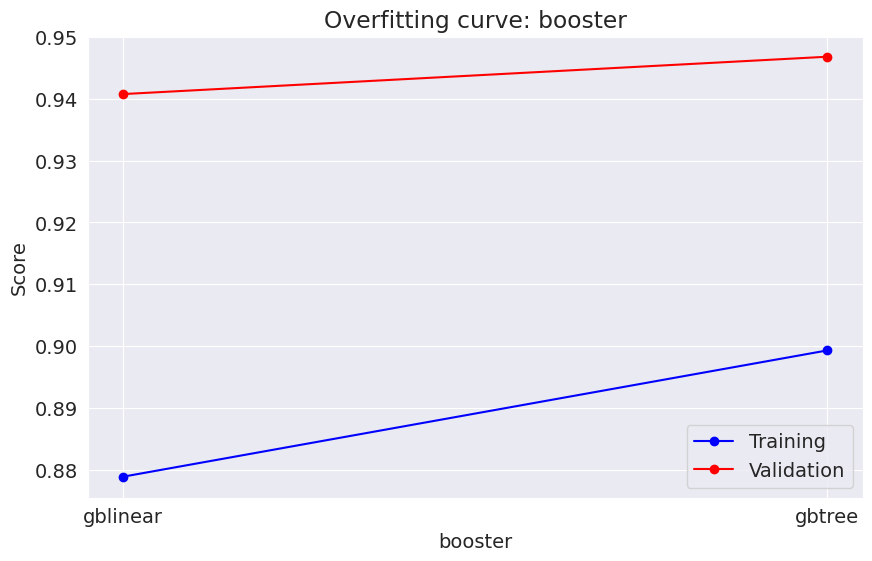

In [156]:
test_param_and_plot('booster', ['gblinear', 'gbtree'])

### Putting it Together and Making Predictions

Let's train a final model with custom hyperparameters.

In [157]:
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss", n_jobs=-1,
                      n_estimators=60, max_depth=4, booster='gbtree', learning_rate=0.1)

In [158]:
model.fit(X_train, train_target)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [159]:
train_preds = model.predict(X_train)
accuracy_score(train_target, train_preds)

0.8841973789683649

In [160]:
val_preds = model.predict(X_val)
accuracy_score(val_target, val_preds)

0.9476202997633447

## Best Model Performances

1. **Logistic Regression**
    1. Accuracy Score : 87.9% on training set
    2. Accuracy Score : 94.1% on validation set

2. **Decision Tree**
    1. Accuracy Score : 88.1% on training set
    2. Accuracy Score : 94.7% on validation set

3. **Random Forest**
    1. Accuracy Score : 91.9% on training set
    2. Accuracy Score : 94.8% on validation set
4. **Gradient Boosting**
    1. Accuracy Score : 88.4% on training set
    2. Accuracy Score : 94.7% on validation set


## Saving model with the best performance

We can use the `joblib` module to save and load Python objects on the disk.

In [161]:
import joblib

In [162]:
IsBadBuy = {
    'model': rf2,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [163]:
joblib.dump(IsBadBuy, 'IsBadBuy.joblib')

['IsBadBuy.joblib']

The object can be loaded back using `joblib.load`

In [164]:
model1 = joblib.load('IsBadBuy.joblib')

In [165]:
train_preds2 = model1['model'].predict(X_train)
accuracy_score(train_target, train_preds2)

0.9191133978338274

In [166]:
test_df

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear
0,73015,2009-12-02,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,18881,30212,GA,6500.0,0,2152,2009
1,73016,2009-12-02,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,18111,30212,GA,6300.0,0,1118,2009
2,73017,2009-12-02,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,18111,30212,GA,9700.0,0,1215,2009
3,73018,2009-12-02,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,18881,30212,GA,4150.0,0,1933,2009
4,73019,2009-12-02,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,unkown,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,18111,30212,GA,4100.0,0,920,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,2010-11-17,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,20928,33411,FL,7955.0,0,1633,2010
48703,121743,2010-11-17,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,20928,33411,FL,7035.0,0,594,2010
48704,121744,2010-11-17,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,20928,33411,FL,6335.0,0,594,2010
48705,121745,2010-11-17,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,20928,33411,FL,8055.0,0,1038,2010


In [167]:
test_input = test_df[model1['input_cols']].copy()

In [168]:
test_input[model1['numeric_cols']] = model1['scaler'].transform(test_input[model1['numeric_cols']])
test_input[model1['encoded_cols']] = model1['encoder'].transform(test_input[model1['categorical_cols']])
test_pred = model1['model'].predict(test_input[model1['numeric_cols']+model1['encoded_cols']])
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [169]:
jovian.commit(output='IsBadBuy.joblib')

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Making Predictions on New Inputs

Let's define a helper function to make predictions on new inputs.

In [170]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[model['numeric_cols']] = model['scaler'].transform(input_df[model['numeric_cols']])
    input_df[model['encoded_cols']] = model['encoder'].transform(input_df[model['categorical_cols']])
    X_input = input_df[model['numeric_cols'] + model['encoded_cols']]
    pred = model['model'].predict(X_input)[0]
    prob = model['model'].predict_proba(X_input)[0][list(model['model'].classes_).index(pred)]
    print("Prediction for new input is {}, and its probability is {}".format(pred, prob))

In [171]:
new_input={'Auction': 'ADESA',
           'VehYear': 2010,
           'VehicleAge': 5,
           'Make': 'CHEVROLET',
           'Model': 'MALIBU V6',
           'Trim': 'L20',
           'SubModel': '4D Sedan LS',
           'Color': 'SILVER',
           'Transmission': 'AUTO',
           'WheelType': 'Alloy',
           'VehOdo': 95123,
           'Nationality': 'AMERICAN',
           'Size': 'Medium SUV',
           'TopThreeAmericanName': 'GM',
           'MMRAcquisitionAuctionAveragePrice': 13041,
           'MMRAcquisitionAuctionCleanPrice': 10244,
           'MMRAcquisitionRetailAveragePrice': 11564,
           'MMRAcquisitonRetailCleanPrice': 14583,
           'MMRCurrentAuctionAveragePrice': 10883,
           'MMRCurrentAuctionCleanPrice': 12166,
           'MMRCurrentRetailAveragePrice': 15340,
           'MMRCurrentRetailCleanPrice': 16512,
           'BYRNO': 30001,
           'VNST': 'FL',
           'VehBCost': 10100,
           'IsOnlineSale': 1,
           'WarrantyCost': 2789
}

In [172]:
predict_input(model1, new_input)

Prediction for new input is 0, and its probability is 0.8355200953077896
